# Koherens és nem koherens mintavételezés, ablakfüggvények

**Segédlet a Beágyazott és ambiens rendszerek laboratórium (BMEVIMIAC09) tárgyhoz**

Ha egy periodikus jelből *f<sub>s</sub>* mintavételi frekvenciával *N* mintát veszünk, majd kiszámítjuk a regisztrátum diszkrét Fourier-transzformáltját, a spektrumot *&Delta;f=f<sub>s</sub>/N* felbontással kapjuk meg. Koherens mintavételezésről beszélünk, ha a mintavételezett jel (alapharmonikusának) frekvenciája éppen egy DFT pontra esik, azaz _f=M\*&Delta;f=M/N\*f<sub>s</sub>_. Ha meggondoljuk ez egyúttal azt is jelenti, hogy a jelnek éppen *M*, tehát **egész számú periódusát mintavételeztük**.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
from scipy.fftpack import fft, fftshift
%matplotlib inline

In [2]:
fs = 1800    # mintaveteli frekvencia
N = 40       # ennyi mintat veszunk a jelbol
Nsin = N*150 # a "folytonos" jelek es spektrumok pontszama
df = fs/N    # frekvenciafelbontas

In [3]:
def draw_plots(fx, w_lowres):
    t = np.arange(Nsin, dtype=float)/fs
    f = np.arange(-Nsin/2, Nsin/2, dtype=float)*fs/Nsin
    x = np.cos(2*np.pi*fx*t)
    x_lowres = x[0:N]
    w = np.concatenate([np.zeros(int((Nsin-N)/2)), w_lowres, np.zeros(int((Nsin-N)/2))])
    X = np.abs(fftshift(fft(x)))/Nsin
    W = np.abs(fftshift(fft(w)))/w.sum()
    XW = np.abs(fftshift(fft(x_lowres*w_lowres, Nsin)))/w.sum()
    XW_LOWRES = np.abs(fftshift(fft(x_lowres*w_lowres)))/w.sum()
    plt.figure(figsize=[15, 23])
    plt.subplot(3, 2, 1)
    plt.plot(t, x)
    plt.xlim([0.97*(Nsin-N)/2/fs, 1.03*(Nsin+N)/2/fs])
    plt.ylim([x.min()-0.1, x.max()+0.1])
    plt.title('Jel')
    plt.subplot(3, 2, 2)
    plt.plot(f, X)
    plt.xlim([f.min(), f.max()])
    plt.ylim([0, X.max()*1.2])
    plt.title('Jel spektruma')
    plt.subplot(3, 2, 3)
    plt.plot(t, w)
    plt.xlim([0.97*(Nsin-N)/2/fs, 1.03*(Nsin+N)/2/fs])
    plt.ylim([w.min()-0.1, w.max()+0.1])
    plt.title('Ablak')
    plt.subplot(3, 2, 4)
    plt.plot(f, W)
    plt.xlim([f.min(), f.max()])
    plt.ylim([0, W.max()*1.2])
    plt.title('Ablak spektruma')
    plt.subplot(3, 2, 5)
    plt.plot(t, w*x)
    plt.xlim([0.97*(Nsin-N)/2/fs, 1.03*(Nsin+N)/2/fs])
    plt.ylim([(w*x).min()-0.1, (w*x).max()+0.1])
    plt.title('Ablakozott jel')
    plt.subplot(3, 2, 6)
    plt.plot(f, XW)
    m, l, _ = plt.stem(np.arange(-N/2, N/2, dtype=float)*fs/N, XW_LOWRES)
    plt.setp(m, 'color', 'red')
    plt.setp(l, 'color', 'red')
    plt.xlim([f.min(), f.max()])
    plt.ylim([0, XW.max()*1.2])
    plt.title('Ablakozott jel spektruma')

### Néhány gyakran használt ablakfüggvény és spektrumaik

Ablakfüggvény választásánál általában két szempontot tartunk szem előtt: milyen kicsi (vagy milyen gyorsan csökken) az **oldalhullámok magassága**, illetve mennyire lapos a **főhullám csúcsa**. A kellően kicsi oldalhullámok csökkentik a szivárgás jelenségét, a lapos főhullám pedig nem koherens mintavételezés esetén is lehetővé teszi a jel amplitúdójának pontos mérését. Az alábbiakban láthatunk példát néhány gyakran használt ablakfüggvényre. Az összehasonlíthatóság érdekében az amplitúdóspektrumok azonos skálán, decibelben vannak ábrázolva.

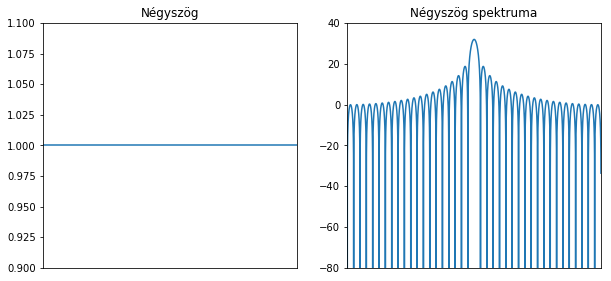

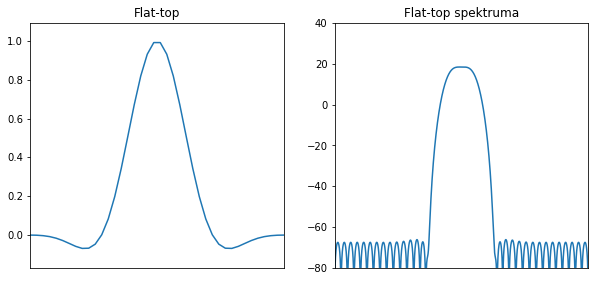

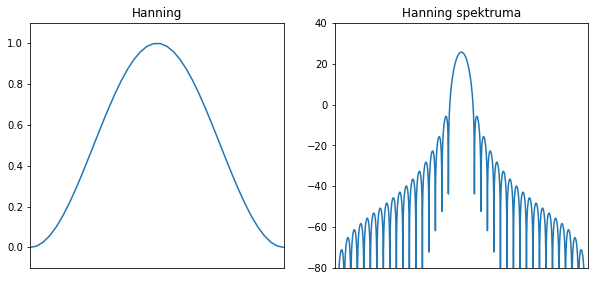

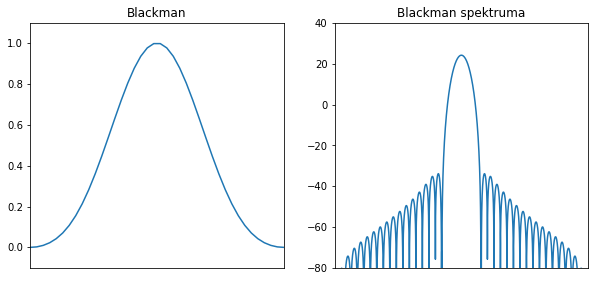

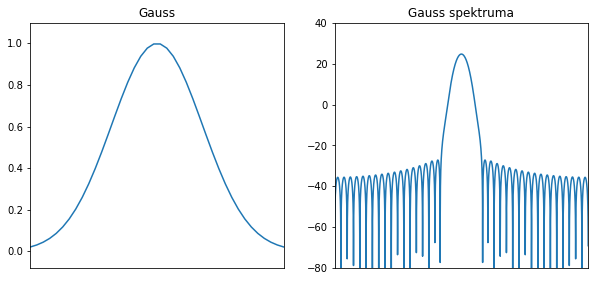

In [4]:
win = np.empty(5, dtype = [('data', float, N), ('name', object)])
win[0] = np.ones(N), 'Négyszög'
win[1] = signal.flattop(N), 'Flat-top'
win[2] = signal.hanning(N), 'Hanning'
win[3] = signal.blackman(N), 'Blackman'
win[4] = signal.gaussian(N,std=7), 'Gauss'

for w in win:
    plt.figure(figsize=[10, 4.5])
    plt.subplot(1, 2, 1)
    plt.plot(w['data'])
    plt.xticks([])
    plt.xlim([0, N-1])
    plt.ylim([w['data'].min()-0.1,w['data'].max()+0.1])
    plt.title(w['name'])
    plt.subplot(1, 2, 2)
    wf = 20*np.log10(np.abs(fftshift(fft(w['data'], Nsin))).clip(min=1e-6))
    plt.plot(wf)
    plt.xticks([])
    plt.xlim([0, Nsin-1])
    plt.ylim([-80, 40])
    plt.title(w['name'] + ' spektruma')

### Koherens mintavételezés, négyszögablak

Az alábbi szinuszos jelből pontosan hat periódust mintavételeztünk ablakozás nélkül. A véges hosszúságú regisztrátum matematikailag úgy tekinthető, mintha a végtelen hosszú jelet egy hat periódus széles négyszögablakkal szoroztuk volna össze. Frekvenciatartományban ez konvolúciót jelent, és mivel a tiszta szinuszjel spektruma egy-egy Dirac-delta a pozitív és negatív frekvenciákon, az ablakozott jel spektruma az ablakfüggvény spektrumának eltoltjaiból tevődik össze. A koherens mintavételezés azt eredményezi, hogy a DFT éppen azokban a pontokban mintavételezi a folytonos spektrumot, ahol a főhullámok csúcsai, illetve az oldalhullámok zérushelyei vannak, hiba nélkül visszakapjuk tehát az eredeti jel spektrumát.

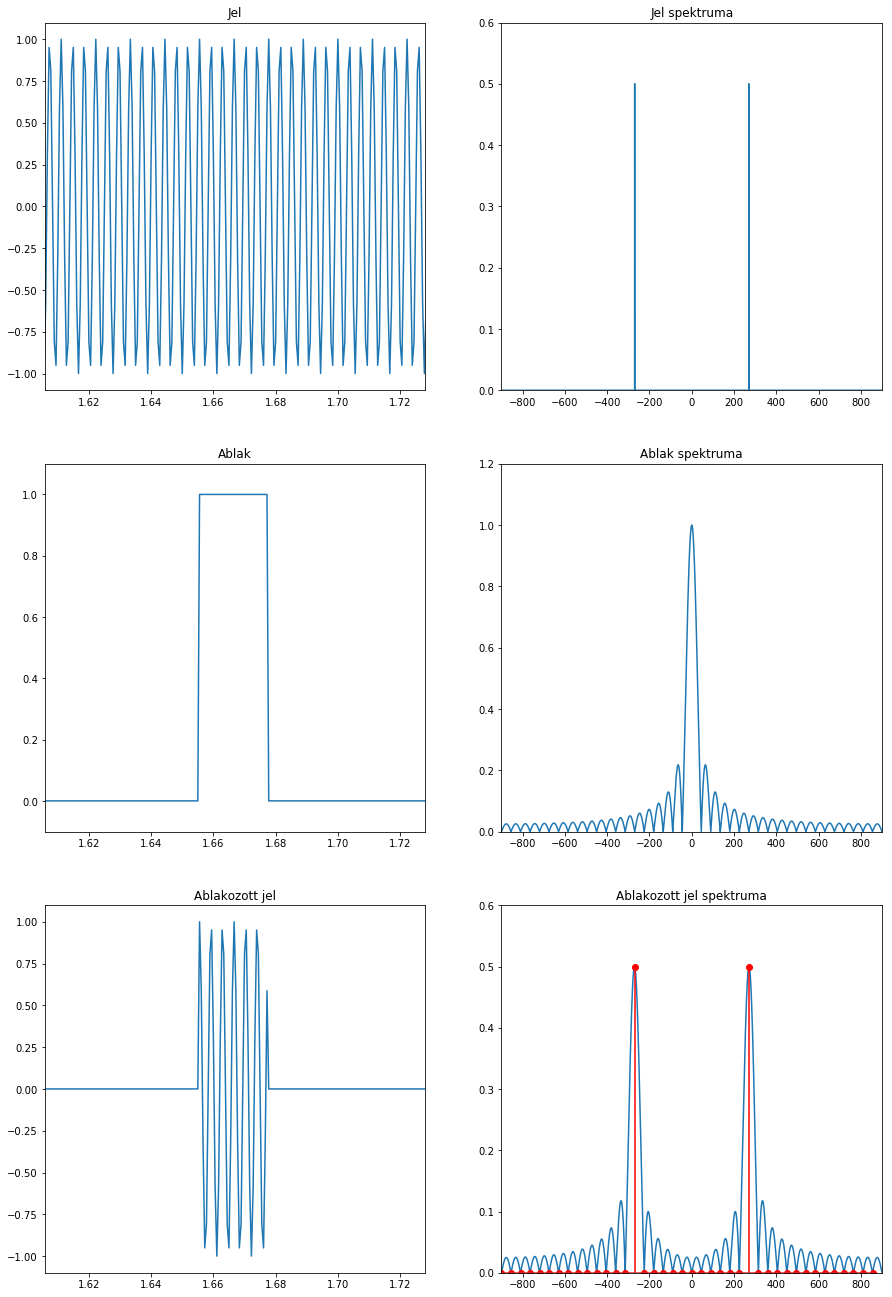

In [5]:
draw_plots(6*df, win['data'][0])

### Lehető legkevésbé koherens mintavételezés, négyszögablak

Tekintsük most a lehető legkedvezőtlenebb esetet: 6,5 periódust mintavételezünk, a jel frekvenciája tehát éppen két DFT pont között félúton helyezkedik el. Az ablakozott jel folytonos spektruma ismét az előbb látott módon áll elő, azonban a DFT ezúttal nem az ideális pontokban mintavételezi azt. Ennek következményei jól láthatók: egyrészt a kapott spektrumról nem tudjuk pontosan leolvasni az eredeti jel frekvenciáját, sem az amplitúdóját, másrészt azokon a frekvenciákon is nullától különböző értékeket kaptunk, amelyeken a jelnek nem volt komponense. Ez utóbbi jelenséget **spektrális szivárgásnak** (spectral leakage) nevezzük.

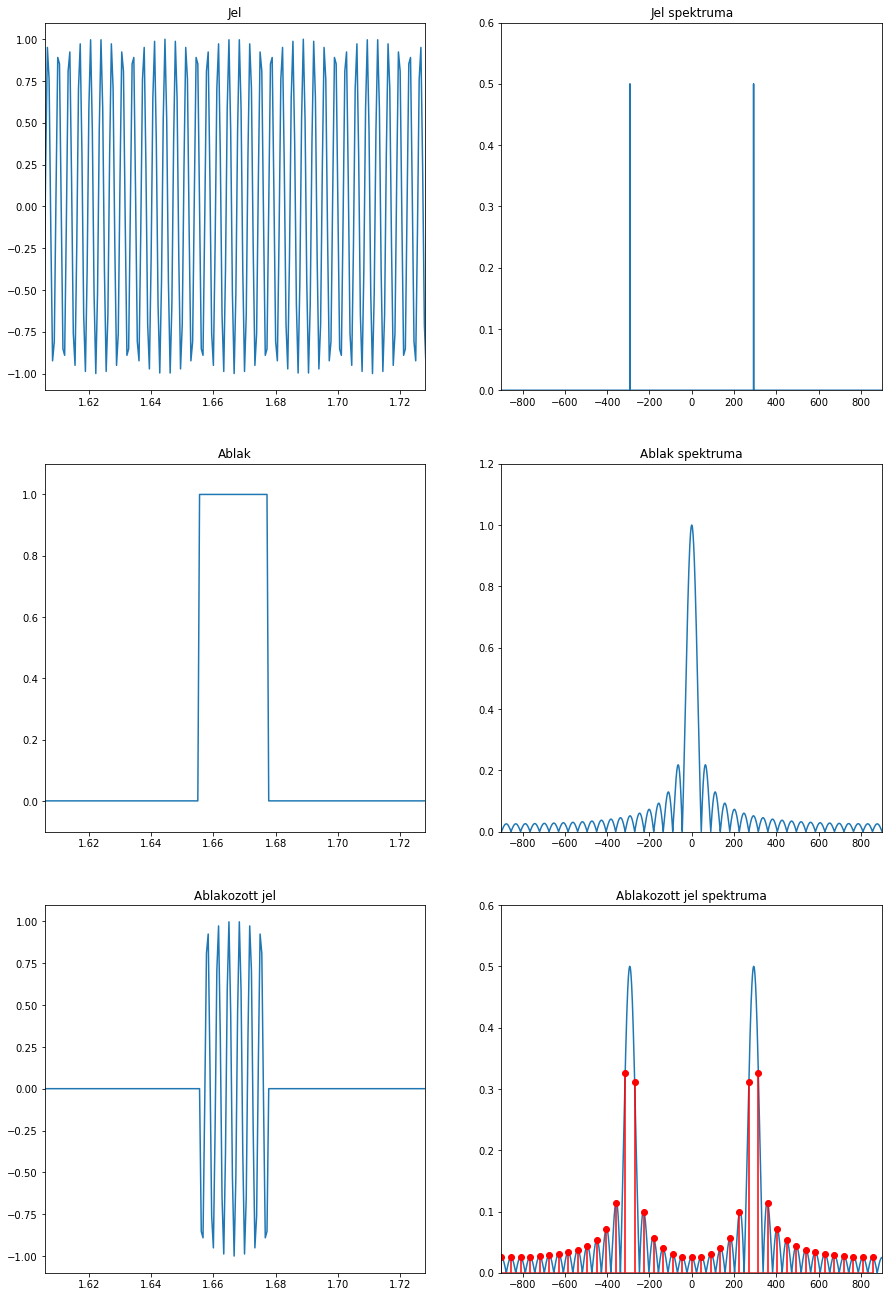

In [6]:
draw_plots(6.5*df, win['data'][0])

### Lehető legkevésbé koherens mintavételezés, flat-top ablak

A problémán segíthetünk egy olyan ablakfüggvény alkalmazásával, amelynek oldalhullámai a négyszögablakénál alacsonyabbak. Továbbra is az oldalhullámok maximumainak közelében lesznek a DFT rács pontjai, azonban ezek az értékek számottevően alacsonyabbak, mint az előző esetben, így a szivárgás problémáján sokat segíthetünk. A flat-top ablak olyan esetekben ideális, amikor kiemelten fontos az amplitúdó minél pontosabb becslése: láthatjuk, hogy a főhullám lassan kezd csökkenni, ezért még nagy frekvenciahiba esetén is nagy pontossággal olvashatjuk le az amplitúdót. Hátránya, hogy a széles főhullám a jel frekvenciájának környezetében nagy szivárgást eredményez.

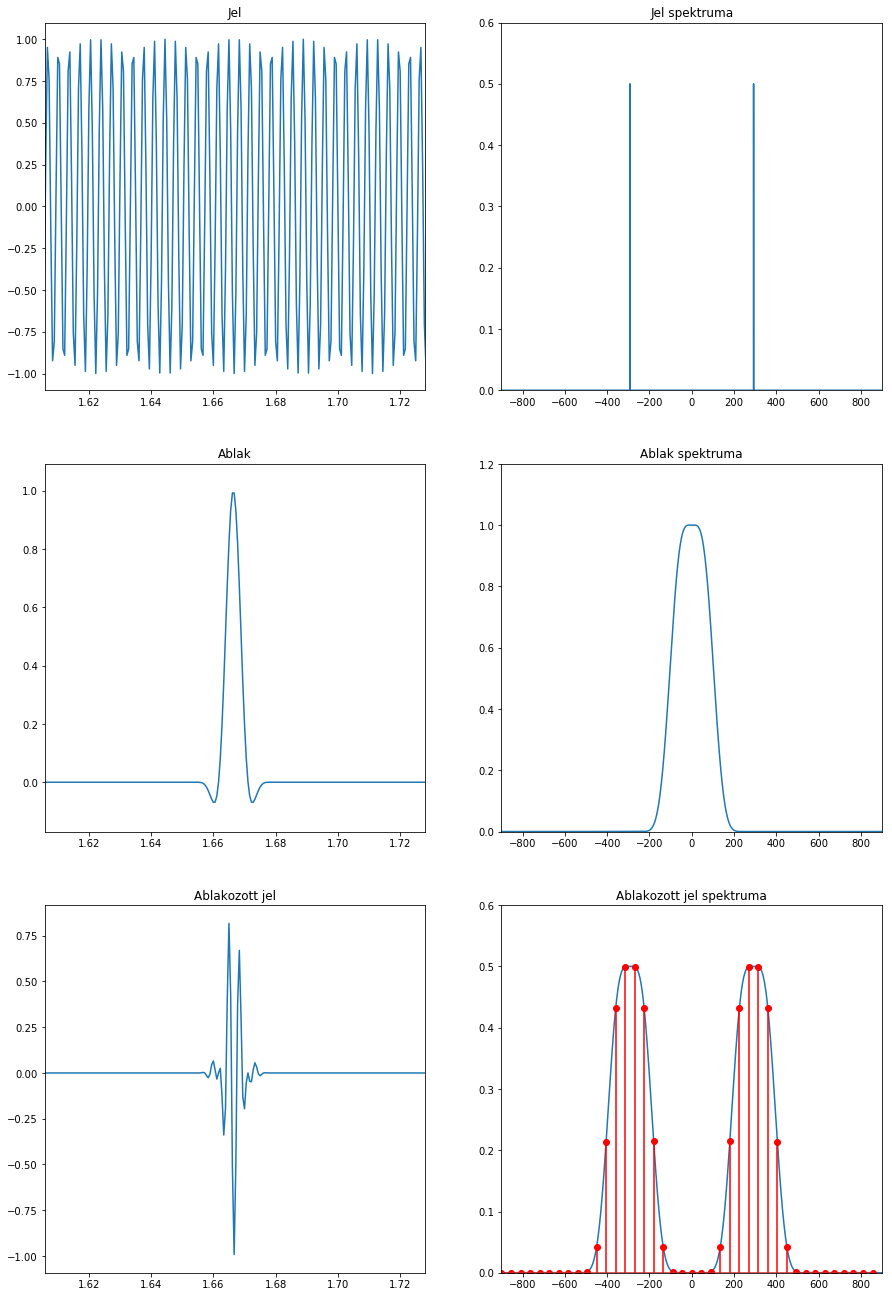

In [7]:
draw_plots(6.5*df, win['data'][1])

### Lehető legkevésbé koherens mintavételezés, Blackman-ablak

Keskenyebb főhullámú ablak választása esetén csökken a jelkomponensek környezetében tapasztalt szivárgás – az amplitúdómérés pontosságának rovására.

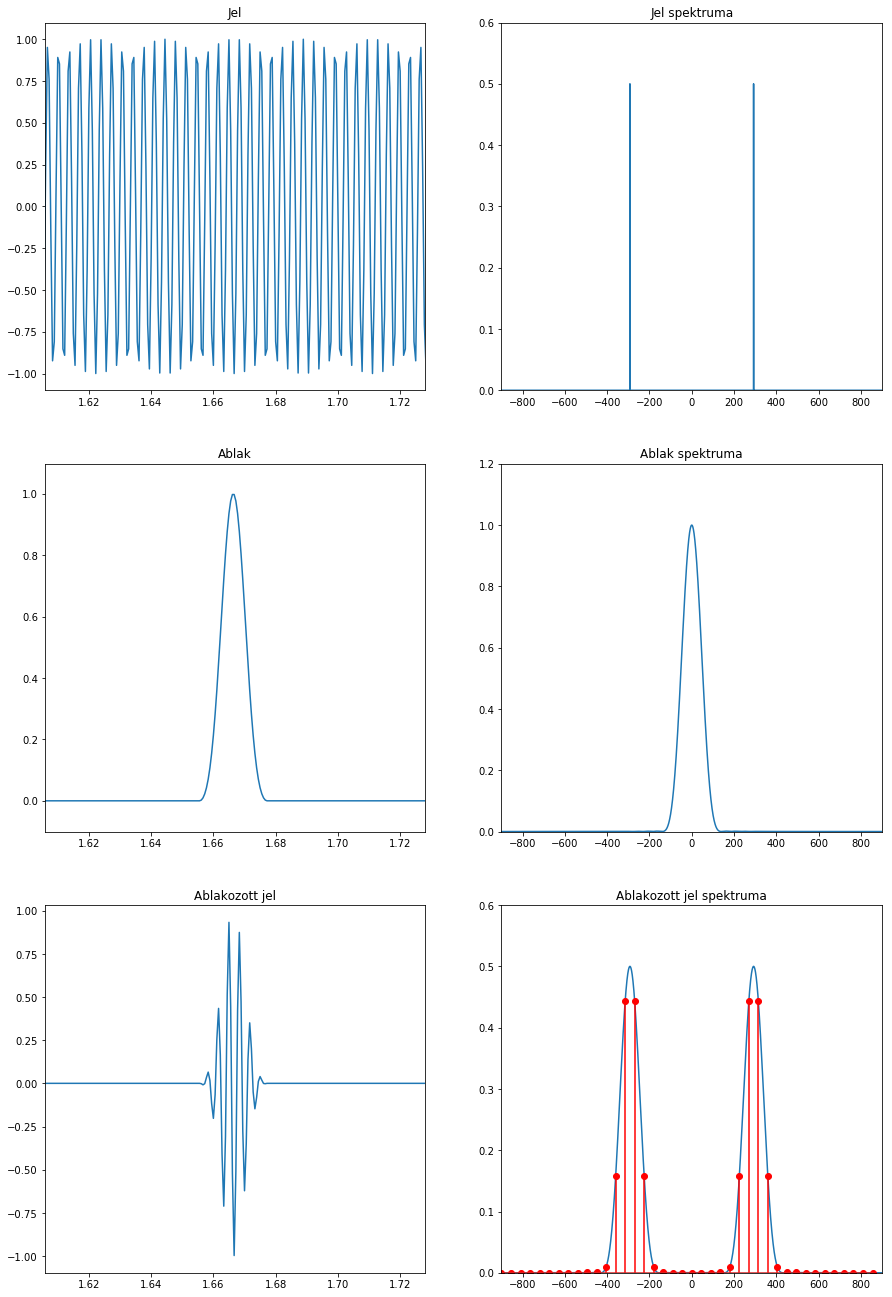

In [8]:
draw_plots(6.5*df, win['data'][3])